In [1]:
library(dplyr)
library(tabplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Loading required package: ff
Attaching package ff
- getOption("fftempdir")=="/var/folders/9d/ql46h1757fsff_cwqg8kymm40000gn/T//RtmpmBaqab"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption

In [2]:
df <- read.csv("../data/middle/sp2.csv", stringsAsFactors=FALSE)

In [3]:
names(df)

[1] "Time"              "Longitude"         "Latitude"         
 [4] "Speed"             "Brake"             "Accel"            
 [7] "Engine"            "AheadDistance"     "Curve150"         
[10] "Curve100"          "Curve"             "SteeringAngle"    
[13] "BranchFlag"        "DistTollgate"      "RoadType"         
[16] "GreenLamp"         "RedLamp"           "RightLamp"        
[19] "UpLamp"            "LeftLamp"          "StopSign"         
[22] "Limit30Sign"       "Limit50Sign"       "BrakeCar"         
[25] "LeftCar"           "ManBicycleCount"   "ManBicycle"       
[28] "DistManBicycle"    "Pitch"             "DistSignal"       
[31] "PathType"          "LaneCount"         "AccelerationSpeed"
[34] "Jerk"              "TimeHeadway"       "TimeToCollision"  
[37] "RiskFactor"        "AverageVelocity"   "CurveAverage"     
[40] "flag"

In [4]:
invalids <- c('Time', 'Longitude', 'Latitude', 'Brake', 'Accel', 'flag', 'Curve100', 'Curve150')

In [5]:
df$flag[df$flag == "RedA"] <- "Red"
df$flag[df$flag == "RedB"] <- "Red"
df$flag[df$flag == "BlueA"] <- "Blue"
df$flag[df$flag == "BlueB"] <- "Blue"
df$flag <- as.factor(df$flag)

     Speed        AheadDistance    AverageVelocity     TimeHeadway     
 Min.   :  2.89   Min.   :  0.00   Min.   : 0.03571   Min.   : 0.0000  
 1st Qu.: 22.93   1st Qu.:  0.00   1st Qu.:18.27094   1st Qu.: 0.8954  
 Median : 35.55   Median : 15.05   Median :20.44057   Median : 1.9381  
 Mean   : 36.78   Mean   : 17.34   Mean   :21.23080   Mean   : 1.9171  
 3rd Qu.: 46.45   3rd Qu.: 25.20   3rd Qu.:26.09928   3rd Qu.: 2.7144  
 Max.   :105.85   Max.   :115.20   Max.   :30.97930   Max.   :13.4531  

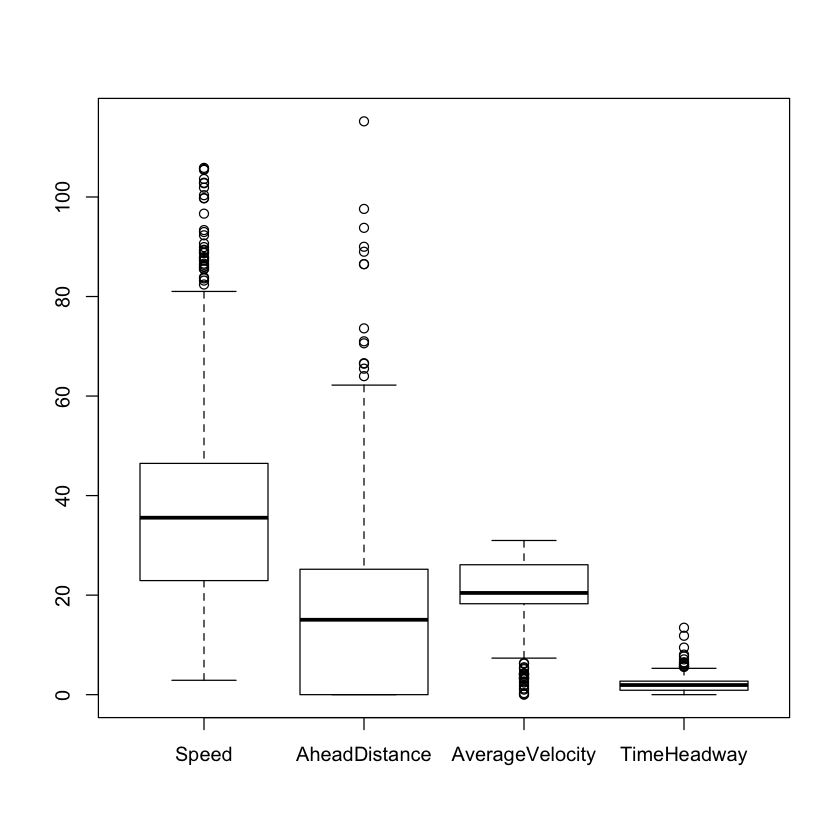

In [6]:
summary(select(df, Speed, AheadDistance, AverageVelocity, TimeHeadway))
boxplot(select(df, Speed, AheadDistance, AverageVelocity, TimeHeadway))

   RiskFactor         CurveAverage  
 Min.   :-56.58716   Min.   : 41.0  
 1st Qu.:  0.00000   1st Qu.:128.2  
 Median :  0.29604   Median :224.0  
 Mean   :  0.09544   Mean   :190.0  
 3rd Qu.:  0.46910   3rd Qu.:251.0  
 Max.   :  5.25297   Max.   :255.0  

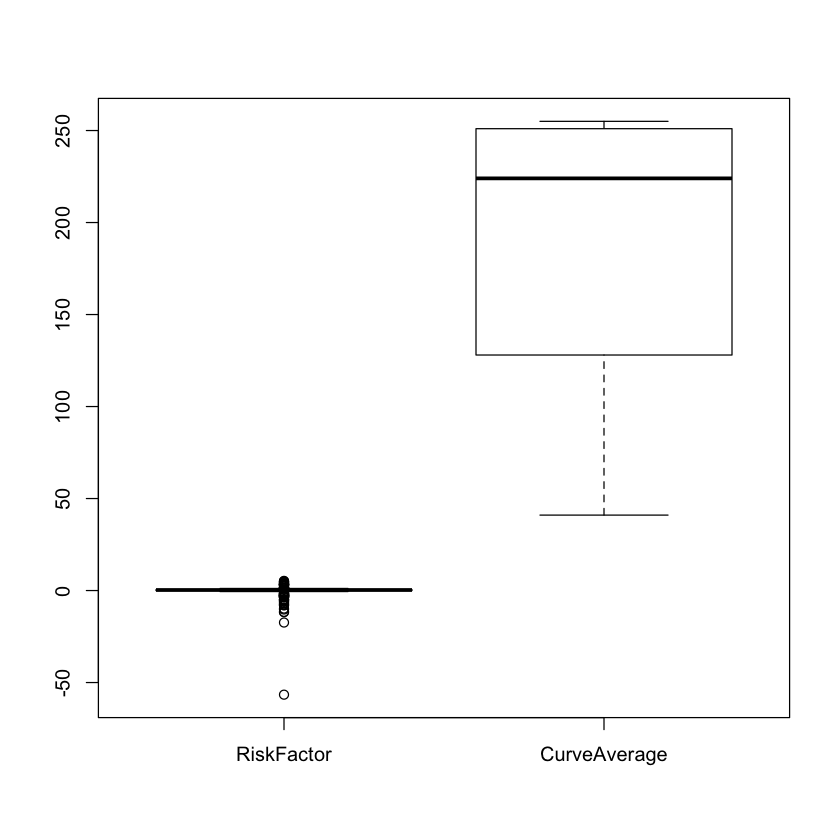

In [7]:
summary(select(df, RiskFactor, CurveAverage))
boxplot(select(df, RiskFactor, CurveAverage))

 TimeToCollision    
 Min.   :-5096.329  
 1st Qu.:  -27.932  
 Median :   -1.977  
 Mean   :   47.971  
 3rd Qu.:    0.000  
 Max.   :19211.294  

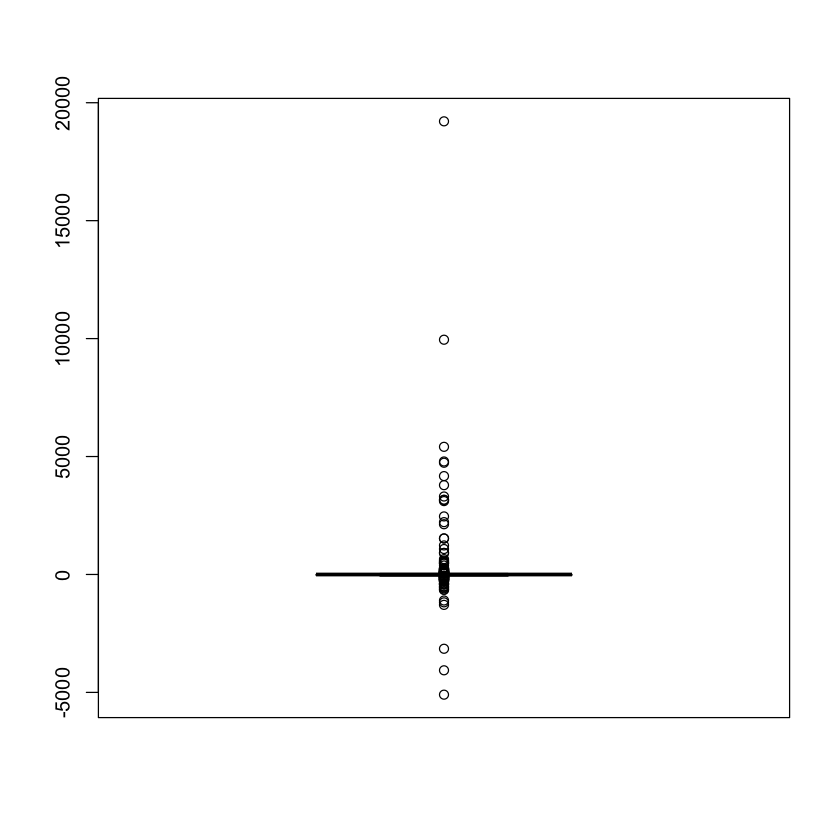

In [8]:
summary(select(df, TimeToCollision))
boxplot(select(df, TimeToCollision))

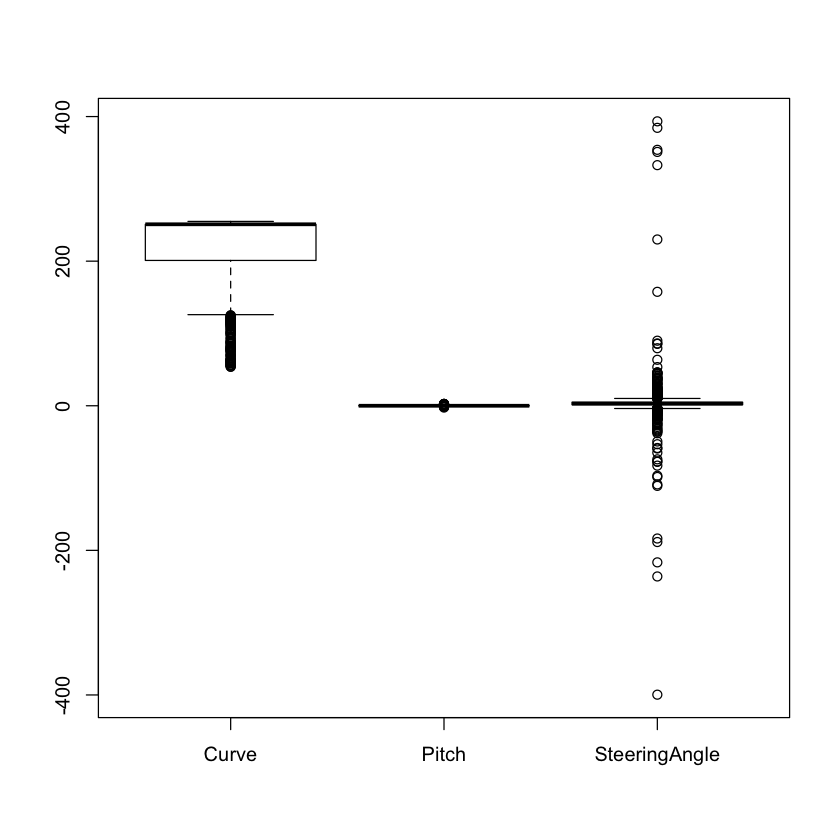

In [9]:
boxplot(select(df, Curve, Pitch, SteeringAngle))

   DistSignal      AccelerationSpeed    LaneCount          Jerk        
 Min.   :   1.22   Min.   :-1.10556   Min.   :0.000   Min.   :-4.1111  
 1st Qu.:  49.11   1st Qu.:-0.12222   1st Qu.:0.000   1st Qu.:-0.2222  
 Median : 108.95   Median : 0.02222   Median :2.000   Median : 0.3056  
 Mean   : 166.78   Mean   : 0.06451   Mean   :1.761   Mean   : 0.3442  
 3rd Qu.: 192.83   3rd Qu.: 0.21667   3rd Qu.:3.000   3rd Qu.: 0.8333  
 Max.   :1081.25   Max.   : 1.83889   Max.   :3.000   Max.   : 6.8889  

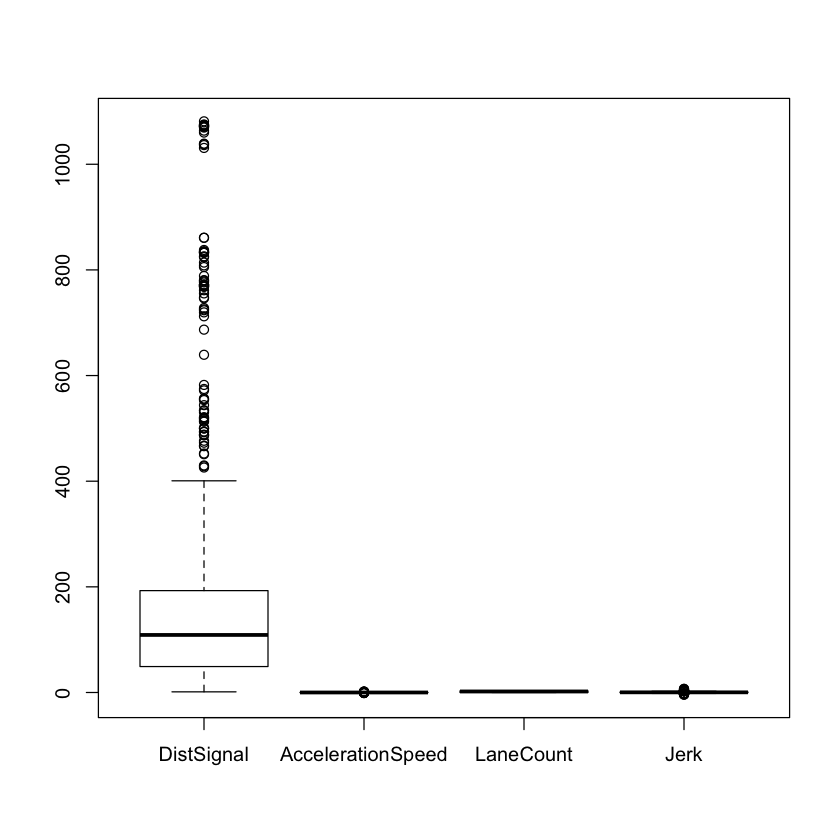

In [10]:
summary(select(df, DistSignal, AccelerationSpeed, LaneCount, Jerk ))
boxplot(select(df, DistSignal, AccelerationSpeed, LaneCount, Jerk ))

     Engine      
 Min.   : 731.2  
 1st Qu.:1240.6  
 Median :1346.9  
 Mean   :1367.6  
 3rd Qu.:1471.9  
 Max.   :3109.4  

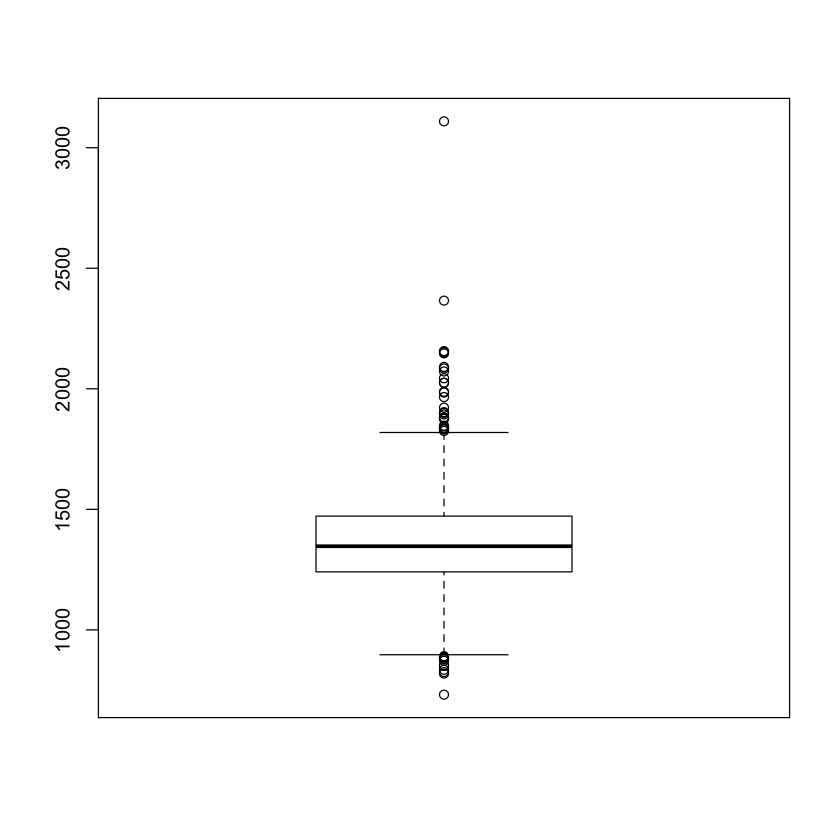

In [11]:
summary(select(df, Engine))
boxplot(select(df, Engine))

In [16]:
summary(scale(select(df, -flag)))

      Time             Longitude          Latitude           Speed         
 Min.   :-1.787422   Min.   :-1.6150   Min.   :-1.4618   Min.   :-1.77872  
 1st Qu.:-0.791373   1st Qu.:-0.7666   1st Qu.:-0.8521   1st Qu.:-0.72690  
 Median : 0.002207   Median :-0.2876   Median :-0.3139   Median :-0.06448  
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.809554   3rd Qu.: 1.2030   3rd Qu.: 0.9089   3rd Qu.: 0.50729  
 Max.   : 2.040586   Max.   : 1.7389   Max.   : 1.7266   Max.   : 3.62457  
                                                                           
     Brake          Accel          Engine         AheadDistance    
 Min.   : NA    Min.   : NA    Min.   :-3.00712   Min.   :-1.0873  
 1st Qu.: NA    1st Qu.: NA    1st Qu.:-0.59990   1st Qu.:-1.0873  
 Median : NA    Median : NA    Median :-0.09778   Median :-0.1437  
 Mean   :NaN    Mean   :NaN    Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: NA    3rd Qu.: NA    3rd Qu.: 0.49295   3r

In [20]:
df.scale <- scale(select(df, -flag))